In [1]:
import numpy as np
import shutil
import os
import glob
import pandas as pd
import matplotlib.pylab as plt
import pickle
#plt.switch_backend('agg')
% matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
data_dir_1 = '/Users/A2Z/Desktop/PhD-Code/Features_extraction/latest-version-paper1/training_set_features/'

In [3]:
type1 = pd.read_csv(data_dir_1+'Type1_features.csv')
type6 = pd.read_csv(data_dir_1+'Type6_features.csv')
type7 = pd.read_csv(data_dir_1+'Type7_features.csv')
type8 = pd.read_csv(data_dir_1+'Type8_features.csv')

In [4]:
large_sample = pd.concat([type1,type6,type7,type8],axis=0)
large_sample.head()

,0,1,2,3,4,5,File_Name,True_class_labels
0,-0.120668,18.345299,0.265744,-0.335593,0.488750,0.014486,3035136007042,1
1,0.078426,17.171222,0.220157,-0.500803,0.388950,0.012821,3027008004601,1
2,0.039754,18.054979,0.204677,-0.191701,0.381000,0.011336,3041039023698,1
3,0.076899,16.830888,0.134737,0.210377,0.288300,0.008005,3043078046707,1
4,-0.372821,15.360511,0.098379,-0.856744,0.164766,0.006405,3021157013367,1


In [5]:
lC_dir = '../SSS_Per_Var_Cat/'
period_data = pd.read_csv('../Ascii_SSS_Per_Table.txt',delim_whitespace=True,names = ["SSS_ID", "File_Name", "RA", "Dec", "Period", "V_CSS", "Npts", "V_amp", "Type", "Prior_ID", "No_Name1", 'No_Name2'])

periods = period_data[['File_Name', 'Period']]
large_sample['File_Name']=large_sample['File_Name'].astype(int)
large_sample = large_sample.join(periods.set_index('File_Name'), on='File_Name')
large_sample = large_sample[['0','1','2','3','4','5', 'Period', 'File_Name', 'True_class_labels']]
large_sample = large_sample.rename(columns = {'0':'Skew','1':'Mean','2':'Sigma', '3':'Kurtosis', \
                            '4':'Amplitude', '5':'Mean Variance'})


In [ ]:
large_sample.head()

In [ ]:
x_max  = large_sample.iloc[:,0:7].max(axis=0)
X_norm = large_sample.iloc[:,0:7].divide(x_max, axis=1).abs()
X_norm['True_class_labels'] = large_sample['True_class_labels']
X_norm.describe()

In [ ]:
from sklearn.manifold.t_sne import TSNE
def t_SNE(data):
    X_transform = TSNE(n_components=2).fit_transform(data)#, perplexity=20, learning_rate=1000, n_iter=3000
    
    return X_transform

In [ ]:
X_2d        = t_SNE(data=X_norm.iloc[:,0:7])
y           = X_norm.iloc[:,7]

In [ ]:
target_name = ['RRab','EA', 'Rotational', 'LPV']
target_ids  = [1, 6, 7, 8]
colors      = 'r', 'g', 'b', 'y'#, 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
types ='Type1_6_7_8normalised'

plt.figure(figsize=(14,10))

for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label, marker ='.')
plt.tick_params(axis='both', which='major', labelsize=fontSize)
plt.xlabel('$t-SNE \ Feature \ 1$', fontsize=fontSize)
plt.ylabel('$t-SNE \ Feature \ 2$',fontsize=fontSize)
#plt.legend(loc='best', prop={'size': 24})
lgnd = plt.legend(loc="best", numpoints=1, fontsize=fontSize)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [200]
lgnd.legendHandles[2]._sizes = [200]
lgnd.legendHandles[3]._sizes = [200]

plt.tight_layout()
plt.savefig('train_test_set_Type'+'_'+ types +'.pdf')
plt.show()

# Augmented data

In [6]:
#data_dir = './data/rs/MC/training_set/Split_1/Training_features.csv'
data_dir = './data/GP/HC/layer3_RRLyrae/training_set/Split_1/Training_features.csv'
data = pd.read_csv(data_dir)
data.columns=['Skew','Mean','Std','SmallKurtosis','Amplitude','Meanvariance','Period','File_Name','True_class_labels','New_label']
data.head()

,Skew,Mean,Std,SmallKurtosis,Amplitude,Meanvariance,Period,File_Name,True_class_labels,New_label
0,-0.723422,14.791403,0.235842,-0.509129,0.395027,0.015945,0.488195,3019021001365_2,1,1
1,-0.669253,14.790440,0.210968,-0.561852,0.357150,0.014264,0.490765,3019021001365_3,1,1
2,-0.774743,14.799587,0.203295,-0.481658,0.324576,0.013737,0.486848,3019021001365_4,1,1
3,-0.604560,14.791629,0.206224,-0.593270,0.339688,0.013942,0.486936,3019021001365_5,1,1
4,-0.060895,19.338218,0.437060,-0.642995,0.798282,0.022601,0.467078,3019094000701_2,1,1


In [7]:
type1_aug = data[data.True_class_labels == 1][0:10000]
type2_aug = data[data.True_class_labels == 2][0:10000]
type3_aug = data[data.True_class_labels == 3][0:10000]
type4_aug = data[data.True_class_labels == 4][0:10000]
type5_aug = data[data.True_class_labels == 5]
type6_aug = data[data.True_class_labels == 6]
type7_aug = data[data.True_class_labels == 7]
type8_aug = data[data.True_class_labels == 8]
type9_aug = data[data.True_class_labels == 9]
type10_aug = data[data.True_class_labels == 10]
type12_aug = data[data.True_class_labels == 12]

In [8]:
# type1_aug.[type1_aug.columns[0]].values

print(type4_aug.shape)

(10000, 10)


(10000,)


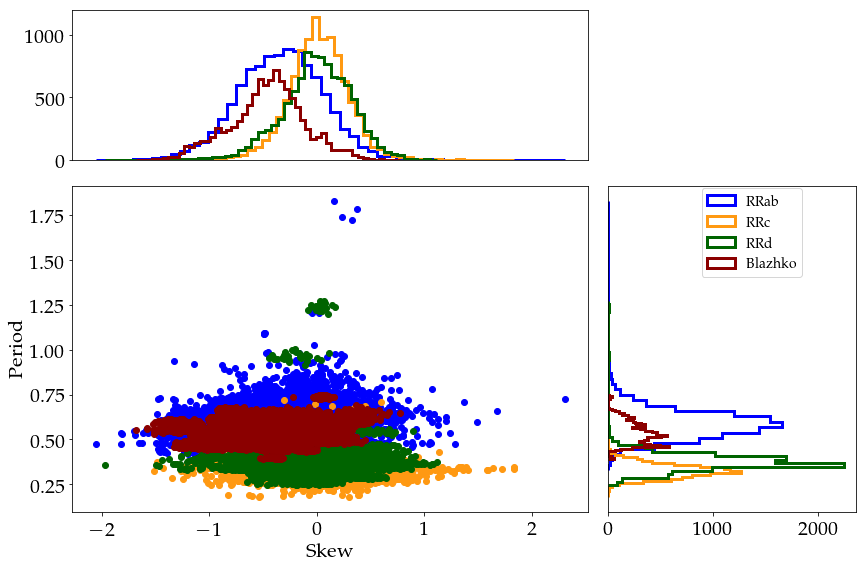

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plots = './plots/'

features_p = type1_aug.columns[6]
features = type1_aug.columns[0]
fig = plt.figure(figsize=figSize)
print(type4_aug[features_p].shape)

scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
plt.ylabel('Period', fontsize=fontSize)
plt.xlabel(features,fontsize=fontSize)

x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,sharex=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,sharey=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
x_hist_axes.axes.get_xaxis().set_visible(False)
y_hist_axes.axes.get_yaxis().set_visible(False)



scatter_axes.plot(type1_aug[features].values, type1_aug[features_p].values, 'o',c='b', label='RRab')
x_hist_axes.hist(type1_aug[features].values,bins=50,histtype='step',color='b',linewidth=3)
y_hist_axes.hist(type1_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='b',linewidth=3,label='RRab')

scatter_axes.plot(type2_aug[features].values, type2_aug[features_p].values, 'o',c='#FF9912',label='RRc')
x_hist_axes.hist(type2_aug[features].values,bins=50,histtype='step',color='#FF9912',linewidth=3)
y_hist_axes.hist(type2_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='#FF9912',linewidth=3,label="RRc")

scatter_axes.plot(type3_aug[features].values,type3_aug[features_p].values, 'o',c='#006400',label='RRd')
x_hist_axes.hist(type3_aug[features].values,bins=50,histtype='step',color='#006400',linewidth=3)
y_hist_axes.hist(type3_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='#006400',linewidth=3,label='RRd')

scatter_axes.plot(type4_aug[features].values, type4_aug[features_p].values, 'o',c='#8B0000',label='Blazhko')
x_hist_axes.hist(type4_aug[features].values, bins=50,histtype='step',color='#8B0000',linewidth=3,label='Blazhko')
y_hist_axes.hist(type4_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='#8B0000',linewidth=3,label='Blazhko')

plt.legend(loc="best",prop={'size':14},bbox_to_anchor=(0.35,0.70))


plt.tight_layout()

plt.savefig(plots+features+'_period_1.pdf', bbox_inches='tight', pad_inches=0.1)

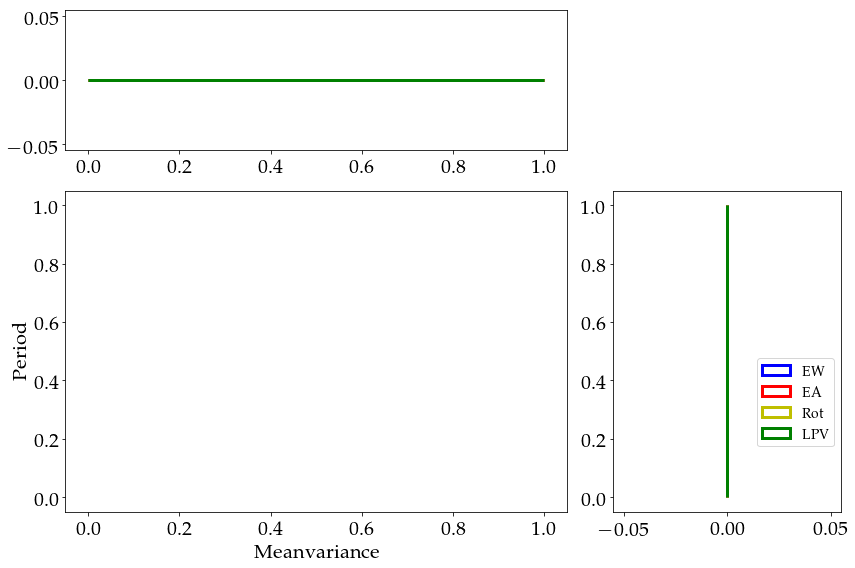

In [10]:
features = type1_aug.columns[5]

fig = plt.figure(figsize=figSize)

scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
plt.ylabel('Period', fontsize=fontSize)
plt.xlabel(features,fontsize=fontSize)

x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)

y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                               sharey=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)

scatter_axes.plot(type5_aug[features].values,type5_aug[features_p].values, '.',c='b')
x_hist_axes.hist(type5_aug[features].values,bins=50,histtype='step',color='b',linewidth=3)
y_hist_axes.hist(type5_aug[features_p].values , orientation='horizontal',bins=50,histtype='step',color='b',linewidth=3,label='EW')

scatter_axes.plot(type6_aug[features].values,type6_aug[features_p].values, '.',c='r')
x_hist_axes.hist(type6_aug[features].values,bins=50,histtype='step',color='r',linewidth=3)
y_hist_axes.hist(type6_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='r',linewidth=3,label="EA")

scatter_axes.plot(type7_aug[features].values,type7_aug[features_p].values, '.',c='y')
x_hist_axes.hist(type7_aug[features].values,bins=50,histtype='step',color='y',linewidth=3)
y_hist_axes.hist(type7_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='y',linewidth=3,label='Rot')

scatter_axes.plot(type8_aug[features].values, type8_aug[features_p].values, '.',c='g')
x_hist_axes.hist(type8_aug[features].values ,bins=50,histtype='step',color='g',linewidth=3)
y_hist_axes.hist(type8_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='g',linewidth=3,label='LPV')

plt.legend(loc="best",prop={'size':14},bbox_to_anchor=(1,0.5))

plt.tight_layout()

plt.savefig(plots+features+'_period_2.pdf', bbox_inches='tight', pad_inches=0.1)

In [ ]:
features = type1_aug.columns[5]
fig = plt.figure(figsize=figSize)

scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
plt.xlabel(features, fontsize=fontSize)
plt.ylabel('Period',fontsize=fontSize)

x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)

y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                               sharey=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)

scatter_axes.plot(type12_aug[features].values, type12_aug[features_p].values, '.',c='#CD6600')
x_hist_axes.hist(type12_aug[features].values,bins=50,histtype='step',color='#CD6600',linewidth=3)
y_hist_axes.hist(type12_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='#CD6600',linewidth=3,label='Cep-II')


scatter_axes.plot(type9_aug[features].values, type9_aug[features_p].values, '.',c='m')
x_hist_axes.hist(type9_aug[features].values,bins=50,histtype='step',color='m',linewidth=3)
y_hist_axes.hist(type9_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='m',linewidth=3,label="Dscuti")

scatter_axes.plot(type10_aug[features].values, type10_aug[features_p].values, '.',c='c')
x_hist_axes.hist(type10_aug[features].values,bins=50,histtype='step',color='c',linewidth=3)
y_hist_axes.hist(type10_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='c',linewidth=3,label='ACEP')


plt.legend(loc="best",prop={'size':14},bbox_to_anchor=(1,0.5))

plt.tight_layout()
plt.savefig(plots+features+'_period_3.pdf', bbox_inches='tight', pad_inches=0.1)

# Small Dataset

In [11]:
type1 = pd.read_csv(data_dir_1+'Type1_features.csv')
type2 = pd.read_csv(data_dir_1+'Type2_features.csv')
type3 = pd.read_csv(data_dir_1+'Type3_features.csv')
type4 = pd.read_csv(data_dir_1+'Type4_features.csv')
type5 = pd.read_csv(data_dir_1+'Type5_features.csv')
type6 = pd.read_csv(data_dir_1+'Type6_features.csv')
type7 = pd.read_csv(data_dir_1+'Type7_features.csv')
type8 = pd.read_csv(data_dir_1+'Type8_features.csv')
type9 = pd.read_csv(data_dir_1+'Type9_features.csv')
type10 = pd.read_csv(data_dir_1+'Type10_features.csv')
type12 = pd.read_csv(data_dir_1+'Type12_features.csv')

all_data = pd.concat([type1,type2,type3,type4,type5,type6,type7,type8,type9,type10,type12],axis=0)
all_data.head()

,0,1,2,3,4,5,File_Name,True_class_labels
0,-0.120668,18.345299,0.265744,-0.335593,0.488750,0.014486,3035136007042,1
1,0.078426,17.171222,0.220157,-0.500803,0.388950,0.012821,3027008004601,1
2,0.039754,18.054979,0.204677,-0.191701,0.381000,0.011336,3041039023698,1
3,0.076899,16.830888,0.134737,0.210377,0.288300,0.008005,3043078046707,1
4,-0.372821,15.360511,0.098379,-0.856744,0.164766,0.006405,3021157013367,1


In [12]:
all_data['File_Name']=all_data['File_Name'].astype(int)
all_data = all_data.join(periods.set_index('File_Name'), on='File_Name')
all_data = all_data[['0','1','2','3','4','5', 'Period', 'File_Name', 'True_class_labels']]
all_data = all_data.rename(columns = {'0':'Skew','1':'Mean','2':'Std', '3':'SmallKurtosis', \
                            '4':'Amplitude', '5':'Meanvariance'})


In [13]:
all_data.head()

,Skew,Mean,Std,SmallKurtosis,Amplitude,Meanvariance,Period,File_Name,True_class_labels
0,-0.120668,18.345299,0.265744,-0.335593,0.488750,0.014486,0.567941,3035136007042,1
1,0.078426,17.171222,0.220157,-0.500803,0.388950,0.012821,0.478337,3027008004601,1
2,0.039754,18.054979,0.204677,-0.191701,0.381000,0.011336,0.624360,3041039023698,1
3,0.076899,16.830888,0.134737,0.210377,0.288300,0.008005,0.612875,3043078046707,1
4,-0.372821,15.360511,0.098379,-0.856744,0.164766,0.006405,0.788797,3021157013367,1


In [14]:
type1_ori = all_data[all_data.True_class_labels==1]
type2_ori = all_data[all_data.True_class_labels==2]
type3_ori = all_data[all_data.True_class_labels==3]
type4_ori = all_data[all_data.True_class_labels==4]
type7_ori = all_data[all_data.True_class_labels==7]
type8_ori = all_data[all_data.True_class_labels==8]
type9_ori = all_data[all_data.True_class_labels==9]
type10_ori = all_data[all_data.True_class_labels==10]
type12_ori = all_data[all_data.True_class_labels==12]

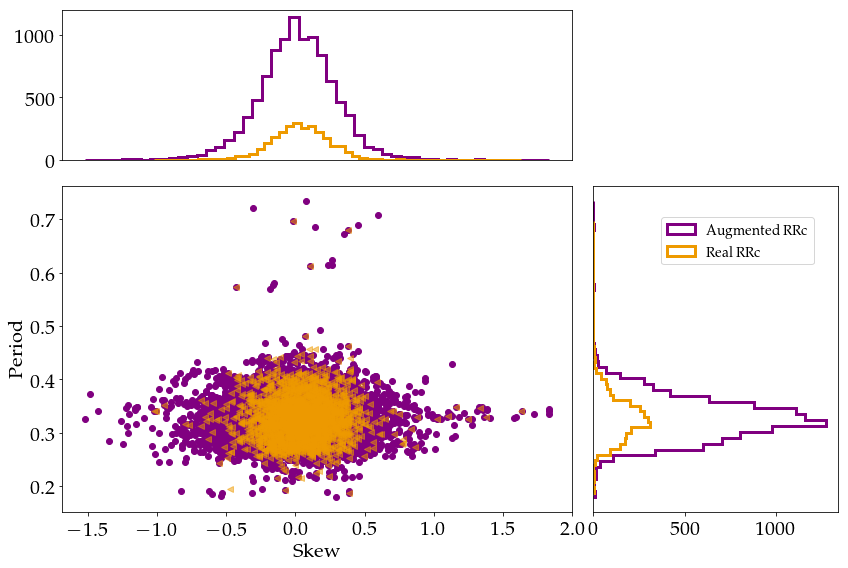

In [37]:
import numpy as np
import matplotlib.pyplot as plt

plots = './plots/'

classes_aug = type2_aug
classes_ori = type2_ori

features_p = type1_aug.columns[6]
features = type1_aug.columns[0]
fig = plt.figure(figsize=figSize)

scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
plt.ylabel('Period', fontsize=fontSize)
plt.xlabel(features,fontsize=fontSize)

x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,sharex=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,sharey=scatter_axes)
plt.tick_params(axis='both', which='major', labelsize=fontSize)
x_hist_axes.axes.get_xaxis().set_visible(False)
y_hist_axes.axes.get_yaxis().set_visible(False)

scatter_axes.plot(classes_aug[features].values, classes_aug[features_p].values, 'o',c='#800080')
x_hist_axes.hist(classes_aug[features].values,bins=50,histtype='step',color='#800080',linewidth=3)
y_hist_axes.hist(classes_aug[features_p].values, orientation='horizontal',bins=50,histtype='step',color='#800080',linewidth=3, label='Augmented RRc')

scatter_axes.plot(classes_ori[features].values, classes_ori[features_p].values, '<',c='#EE9A00', alpha=0.5)
x_hist_axes.hist(classes_ori[features].values,bins=50,histtype='step',color='#EE9A00',linewidth=3)
y_hist_axes.hist(classes_ori[features_p].values, orientation='horizontal',bins=50,histtype='step',color='#EE9A00',linewidth=3,label='Real RRc')


plt.legend(loc="best",prop={'size':14},bbox_to_anchor=(0.25,0.925))

plt.tight_layout()

plt.savefig(plots+features+'_Aug_vs_Ori_8.pdf', bbox_inches='tight', pad_inches=0.1)

In [ ]:
small_sample_data = all_data[all_data.True_class_labels.isin([4,9,10,12])]

In [ ]:
x_max  = small_sample_data.iloc[:,0:7].max(axis=0)
X_norm = small_sample_data.iloc[:,0:7].divide(x_max, axis=1).abs()
X_norm['True_class_labels'] = small_sample_data['True_class_labels']
X_norm.describe()

In [ ]:
X_2d        = t_SNE(data=X_norm.iloc[:,0:7])
y           = X_norm.True_class_labels

In [ ]:
target_name = ['Blazhko','$\delta$-Scuti', 'ACEP', 'Cep-II']
target_ids  = [4, 9, 10, 12]
colors      = 'r', 'g', 'b', 'y'#, 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
types ='Type4_9_10_12_normalised'

plt.figure(figsize=(14,10))

for i, c, label in zip(target_ids, colors, target_name):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label, marker ='.')
plt.tick_params(axis='both', which='major', labelsize=fontSize)
plt.xlabel('$t-SNE \ Feature \ 1$', fontsize=fontSize)
plt.ylabel('$t-SNE \ Feature \ 2$',fontsize=fontSize)
#plt.legend(loc='best', prop={'size': 24})
lgnd = plt.legend(loc="best", numpoints=1, fontsize=fontSize)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [200]
lgnd.legendHandles[2]._sizes = [200]
lgnd.legendHandles[3]._sizes = [200]

plt.tight_layout()
plt.savefig('real_train_test_set_Type'+'_'+ types +'.pdf')
plt.show()